In [2]:
##### Programa de análisis de datos de contagios y fallecidos por el coronavirus en el Ecuador
##### para el período 01 de abril del 2020 al 31 de agosto del 2020
##### Autor: Diego Tamayo U.
##### Fuente de los datos: https://ourworldindata.org/coronavirus-source-data
##### Tipo de archivo analizado: Comma Separated Values (csv)
##### Salidas del programa: 1) Figura con 4 subplots para mostrar: el número de casos diarios, el número de fallecidos diarios,
#####                          el número acumulado de contagiados y el número acumulado de fallecidos
#####                       2) Figura con 2 subplots para mostrar: un gráfico de barras comparativo con el número de contagiados
#####                          y fallecidos en un mismo día y un gráfico de barras comparativo para mostrar el número acumulado
#####                          por millón de habitantes del número de contagios y el número de fallecidos.


# Importamos las librería numpy, pandas y matplotlib.pyplot
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Leemos el archivo csv y lo almacenamos en un dataframe  
data = pd.read_csv("owid-covid-data.csv") 

# Se reemplazan los espacios vacíos en los nombres con '_'  
data.columns =[column.replace(" ", "_") for column in data.columns]

# Se obtiene un nuevo dataframe (df_ecuador) que contenga solo las filas correspondientes a Ecuador de un determinado rango de fechas.
df_ecuador = data[(data.location == "Ecuador") & (data.date >= "2020-04-01") & (data.date <= "2020-08-31")]
df_ecuador

# Se filran únicamente las columnas relevantes para el análisis y, se guarda el resultado en un nuevo dataframe (df_final).
df_final = df_ecuador[["location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_cases_per_million", "total_deaths_per_million"]] 
df_final

# Recalculamos el índice para que sea secuencial
df_final.index = [x for x in range(0, len(df_final.values))]
df_final

# Calculamos el número de filas del dataframe df_final
filas = len(df_final.axes[0]) 
  
# Calculamos el número de columnas del dataframe df_final
columnas = len(df_final.axes[1]) 

# Imprimimos el número de filas y columnas del dataframe df_final
print("Número de filas: ", filas) 
print("Número de columnas: ", columnas)

# Configuraciones sobre el objeto de la figura (figure)
# Mostramos la configuración inicial
print(plt.rcParams.get('figure.figsize'))

# Aplicamos algunos cambios sobre la configuración inicial
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# Mostramos la configuración obtenida luego del cambio
print(plt.rcParams.get('figure.figsize'))

# Filtramos el dataframe df_final, para que solo nos muestre los valores de los eventos obtenidos cada 10 días
# df_final_filtrado es el dataframe base que se utilizará en la construcción de los gráficos de las dos salidas del programa
df_final_filtrado = df_final[(df_final.index % 10 == 0)]


Número de filas:  153
Número de columnas:  8
[6.0, 4.0]
[15.0, 8.0]


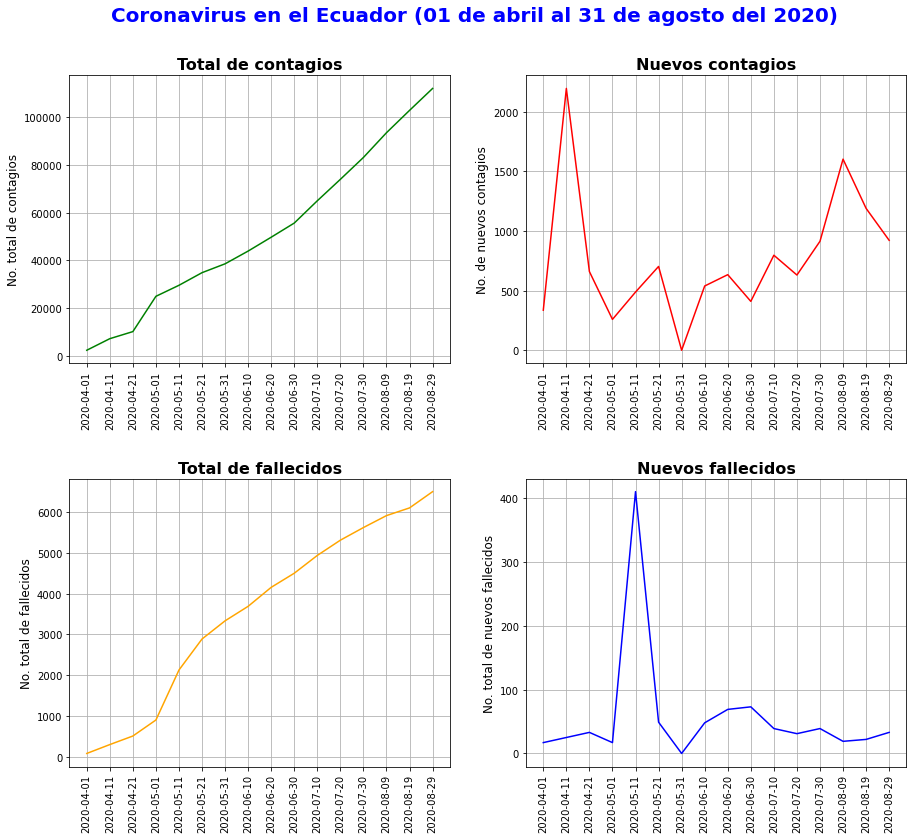

In [3]:
# Salida uno del programa: gráfico con 4 subplots
# Recordamos el contenido del dataframe que será utilizado para los gráficos
df_final_filtrado

# Definimos un objeto figure, que contendrá 4 subplots
fig, a =  plt.subplots(2,2)

# Establecemos la altura del gráfico
fig.set_figheight(12)
fig.suptitle("Coronavirus en el Ecuador (01 de abril al 31 de agosto del 2020)", fontsize=20, fontweight='bold', color="blue", y=0.98)

# Definimos los parámetros del primer subplot, ubicado en la primera fila y primera columna, en la posición a[0][0]
a[0][0].plot(df_final_filtrado["date"], df_final_filtrado["total_cases"], color='green')
a[0][0].set_title('Total de contagios', fontsize=16, fontweight='bold')
a[0][0].set_ylabel('No. total de contagios', fontsize=12)

# Cambiamos la orientación de las etiquetas para su correcta visualización
a[0][0].tick_params(axis='x', labelrotation=90)

# Mostramos una cuadrícula para mejor lectura de los datos
a[0][0].grid()


# Definimos los parámetros del segundo subplot, ubicado en la primera fila y segunda columna, en la posición a[0][1]
a[0][1].plot(df_final_filtrado["date"], df_final_filtrado["new_cases"], color='red')
a[0][1].set_title('Nuevos contagios', fontsize=16, fontweight='bold')
a[0][1].set_ylabel('No. de nuevos contagios', fontsize=12)

# Cambiamos la orientación de las etiquetas para su correcta visualización
a[0][1].tick_params(axis='x', labelrotation=90)

# Cambiamos la orientación de las etiquetas para su correcta visualización
a[0][1].grid()


# Definimos los parámetros del tercer subplot, ubicado en la segunda fila y primera columna, en la posición a[1][0]
a[1][0].plot(df_final_filtrado["date"], df_final_filtrado["total_deaths"], color='orange')
a[1][0].set_title('Total de fallecidos', fontsize=16, fontweight='bold')
a[1][0].set_ylabel('No. total de fallecidos', fontsize=12)

# Cambiamos la orientación de las etiquetas para su correcta visualización
a[1][0].tick_params(axis='x', labelrotation=90)

# Mostramos una cuadrícula para mejor lectura de los datos
a[1][0].grid()


# Definimos los parámetros del cuarto subplot, ubicado en la segunda fila y segunda columna, en la posición a[1][1]
a[1][1].plot(df_final_filtrado["date"], df_final_filtrado["new_deaths"], color='blue')
a[1][1].set_title('Nuevos fallecidos', fontsize=16, fontweight='bold')
a[1][1].set_ylabel('No. total de nuevos fallecidos', fontsize=12)

# Cambiamos la orientación de las etiquetas para su correcta visualización
a[1][1].tick_params(axis='x', labelrotation=90)

# Mostramos una cuadrícula para mejor lectura de los datos
a[1][1].grid()


# Establecemos con figuraciones adicionales para mejorar la apariencia visual de los gráficos
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

# Mostramos el gráfico que contiene los 4 subplots
plt.show()


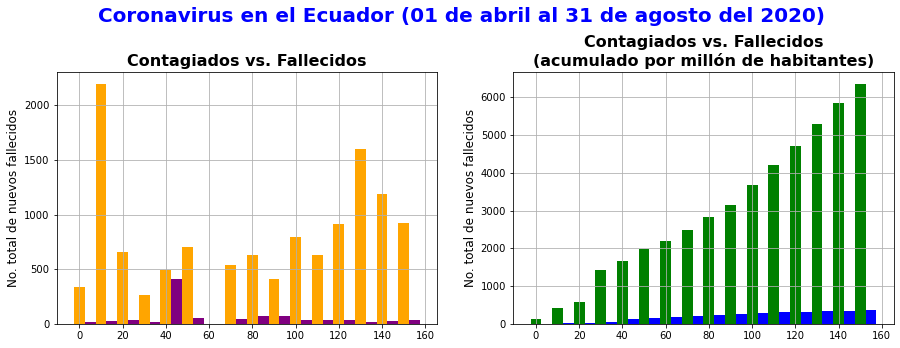

In [4]:
# Salida dos del programa: gráfico con 2 subplots
# Recordamos el contenido del dataframe que será utilizado para los gráficos
df_final_filtrado

# Definimos un nuevo objeto de tipo figure, el cual contiene 2 subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

# Definimos la altura del gráfico
fig.set_figheight(5)
fig.suptitle("Coronavirus en el Ecuador (01 de abril al 31 de agosto del 2020)", fontsize=20, fontweight='bold', color="blue", y=0.98)

# Establecemos el valor del ancho de cada barra que se muestre en los gráficos
ancho_barra = 5.00

# Definimos los dataframes que se utilizarán
contagiados = df_final_filtrado["new_cases"]
fallecidos = df_final_filtrado["new_deaths"]
total_casos_por_millon = df_final_filtrado["total_cases_per_million"]
total_fallecidos_por_millon = df_final_filtrado["total_deaths_per_million"]

# Definimos los parámetros del primer subplot, ubicado en la primera fila y primera columna, en la posición a[0][0] = ax0
ax0.bar(df_final_filtrado.index, contagiados, color="orange", width=ancho_barra)
ax0.bar(df_final_filtrado.index + ancho_barra, fallecidos, color="purple", width=ancho_barra)
ax0.set_title('Contagiados vs. Fallecidos', fontsize=16, fontweight='bold')
ax0.set_ylabel('No. total de nuevos fallecidos', fontsize=12)

# Mostramos una cuadrícula para mejor lectura de los datos
ax0.grid()


# Definimos los parámetros del segundo subplot, ubicado en la primera fila y primera columna, en la posición a[0][1] = ax1
ax1.bar(df_final_filtrado.index, total_casos_por_millon, color="green", width=ancho_barra)
ax1.bar(df_final_filtrado.index + ancho_barra, total_fallecidos_por_millon, color="blue", width=ancho_barra)
ax1.set_title('Contagiados vs. Fallecidos\n(acumulado por millón de habitantes)', fontsize=16, fontweight='bold')
ax1.set_ylabel('No. total de nuevos fallecidos', fontsize=12)

# Mostramos una cuadrícula para mejor lectura de los datos
ax1.grid()


# Establecemos parámetros adicionales de configuración para mejorar la apariencia visual de los gráficos
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.8)

# Mostramos el gráfico que contiene los 2 subplots
plt.show()